In [1]:
import numpy as np
import numpy.linalg as LA
import jax
import jax.numpy as jnp
import jax.numpy.linalg as JLA

import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from jax.example_libraries import optimizers
from tqdm.notebook import trange
from functools import partial

In [2]:
n = 256
m = 128
sigma = 0.1
p = 0.1

A = np.random.randn(m, n)
eig, _ = LA.eig(A.T @ A)
gamma_opt = 1.0/max(eig)
A = jnp.array(A)

In [3]:
def gen_y(x):
    y = A @ x + sigma * jnp.array(np.random.randn(m))
    return y
batch_gen_y = jax.vmap(gen_y, in_axes=-1, out_axes=-1)

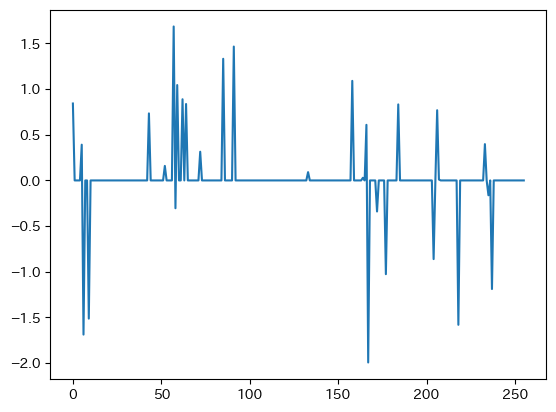

In [37]:
K = 1
seq = np.random.randn(n, K)
support = np.random.binomial(1,p,size=(n, K))
x = jnp.array(seq * support)
plt.plot(range(n), x);
y = batch_gen_y(x)

In [38]:
def softshrink(x, lam):
    return jnp.sign(x) * jnp.max(jnp.append(jnp.abs(x) - lam, 0))

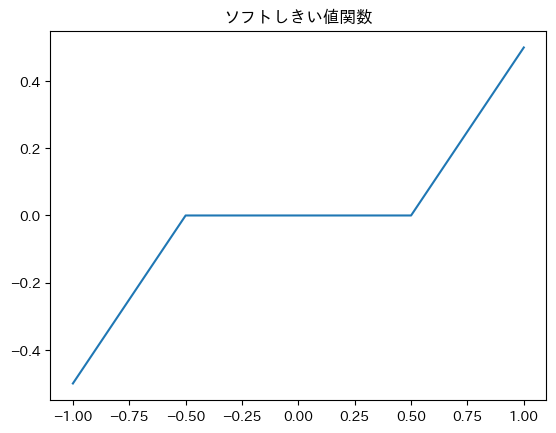

In [39]:
xs = np.linspace(-1, 1, 21)
ys = list(map(partial(softshrink, lam=0.5), xs))
plt.plot(xs, ys)
plt.title("ソフトしきい値関数");

In [40]:
vec_softshrink = jax.jit(jax.vmap(softshrink, in_axes=[-1, None], out_axes=-1))

In [41]:
def ISTA(y, max_itr):
    x = jnp.zeros((n, 1))
    for i in range(max_itr):
        x -= gamma_opt * A.T @ (A@x - y)
        x = vec_softshrink(x.reshape(1, -1), gamma_opt)
        x = x.reshape(n, 1)
    return x

In [42]:
df = pd.DataFrame()
df["idx"] = range(n)
df["grand truth"] = x

/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: xlabel='idx'>

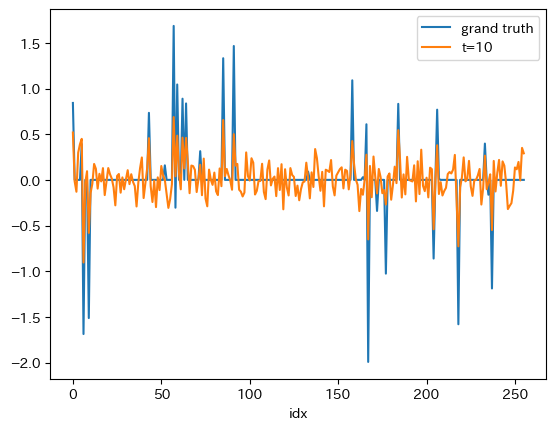

In [43]:
t = 10
df["t={}".format(t)] = ISTA(y, t)
df.plot("idx", ["grand truth", "t={}".format(t)])

/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: xlabel='idx'>

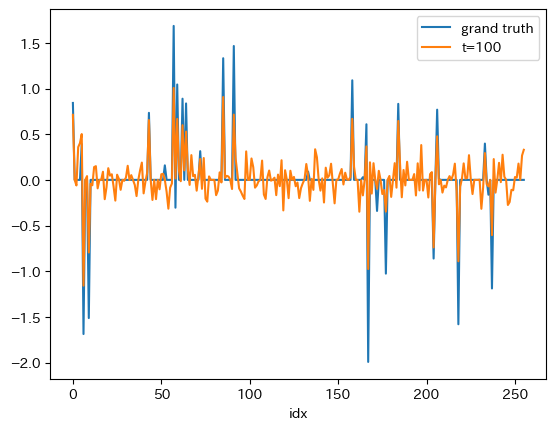

In [44]:
t = 100
df["t={}".format(t)] = ISTA(y, t)
df.plot("idx", ["grand truth", "t={}".format(t)])

/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: xlabel='idx'>

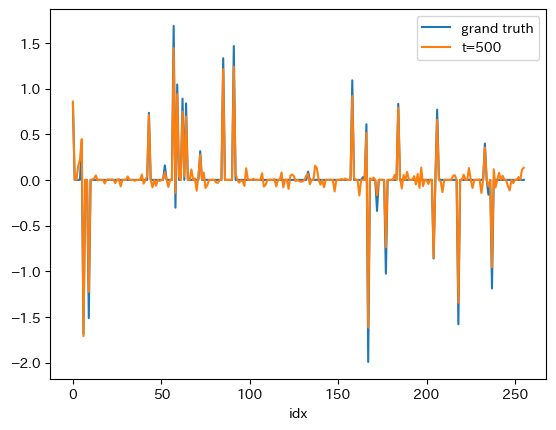

In [45]:
t = 500
df["t={}".format(t)] = ISTA(y, t)
df.plot("idx", ["grand truth", "t={}".format(t)])

/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: xlabel='idx'>

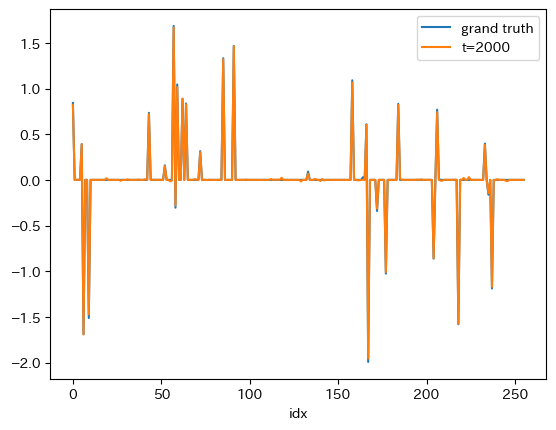

In [46]:
t = 2000
df["t={}".format(t)] = ISTA(y, t)
df.plot("idx", ["grand truth", "t={}".format(t)])

/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return n

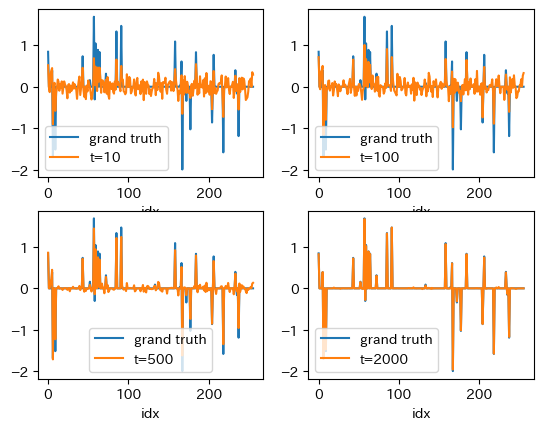

In [47]:
fig, ax = plt.subplots(2, 2)
k = 0
for i in range(2):
    for j in range(2):
        df.plot("idx", [df.columns[1], df.columns[2+k]], ax = ax[i,j]);
        k += 1